# Lab | Classification, Handling Imbalanced Data

Here is the list of steps to be followed (building a simple model without balancing the data):

- Round 1

### 1. Import the required libraries and modules that you would need.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### 2. Read that data into Python and call the dataframe churnData.


In [3]:
churn_df = pd.read_csv('DATA_Customer-Churn.csv') 

In [4]:
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### 3. Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.


In [5]:
print(churn_df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
# Convert the 'TotalCharges' column to numeric type
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

In [7]:
print(churn_df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


### 4. Check for null values in the dataframe. Replace the null values.


In [8]:
print(churn_df.isnull().sum())


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [9]:
churn_df['TotalCharges'].fillna(churn_df['TotalCharges'].mode(), inplace=True)

In [10]:
print(churn_df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [11]:
churn_df['Churn'] = churn_df['Churn'].map({'Yes': 1, 'No': 0})

In [12]:
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,1


In [13]:
churn_df.dropna(inplace=True)
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,1


### 5. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Split the data into a training set and a test set.
- Scale the features either by using normalizer or a standard scaler.
- (optional)Fit a logistic Regression model on the training data.
- Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [14]:
features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
X = churn_df[features]
y = churn_df['Churn']

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [16]:
# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)


**ROUND 2:

- 1. Fit a Decision Tree Classifier on the training data.
- 2. Check the error metric on the test data.

# Applying the model 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')


# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 


model = DecisionTreeClassifier(max_depth=5)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.804348,0.773460
1,Precision,0.687711,0.624672
2,Recall,0.470679,0.415358


## Confusion Matrix

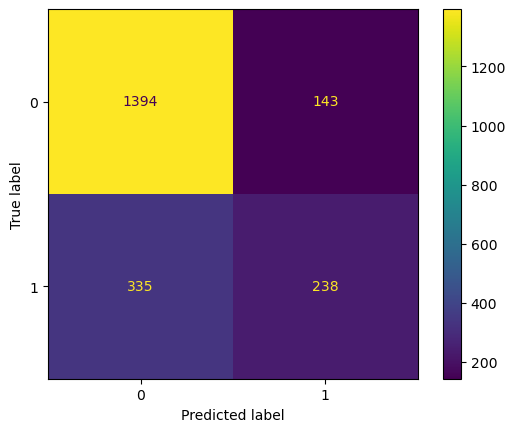

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Feature importance

<BarContainer object of 4 artists>

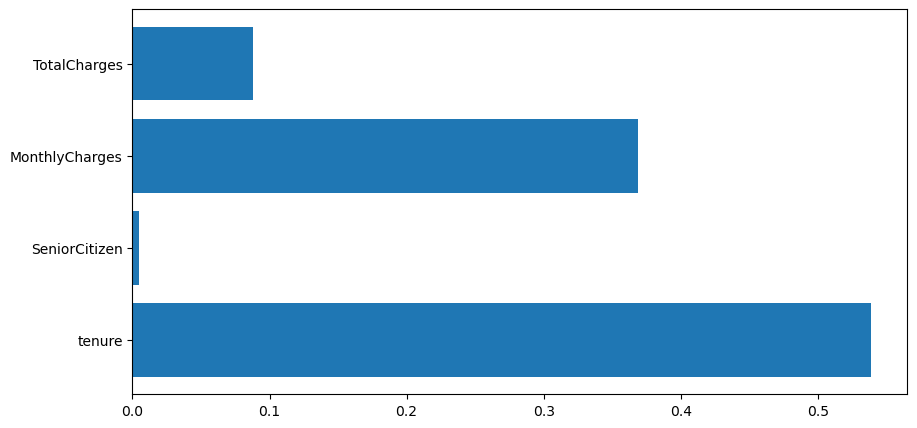

In [38]:
plt.figure(figsize=(10,5))
plt.barh(X.columns,model.feature_importances_)

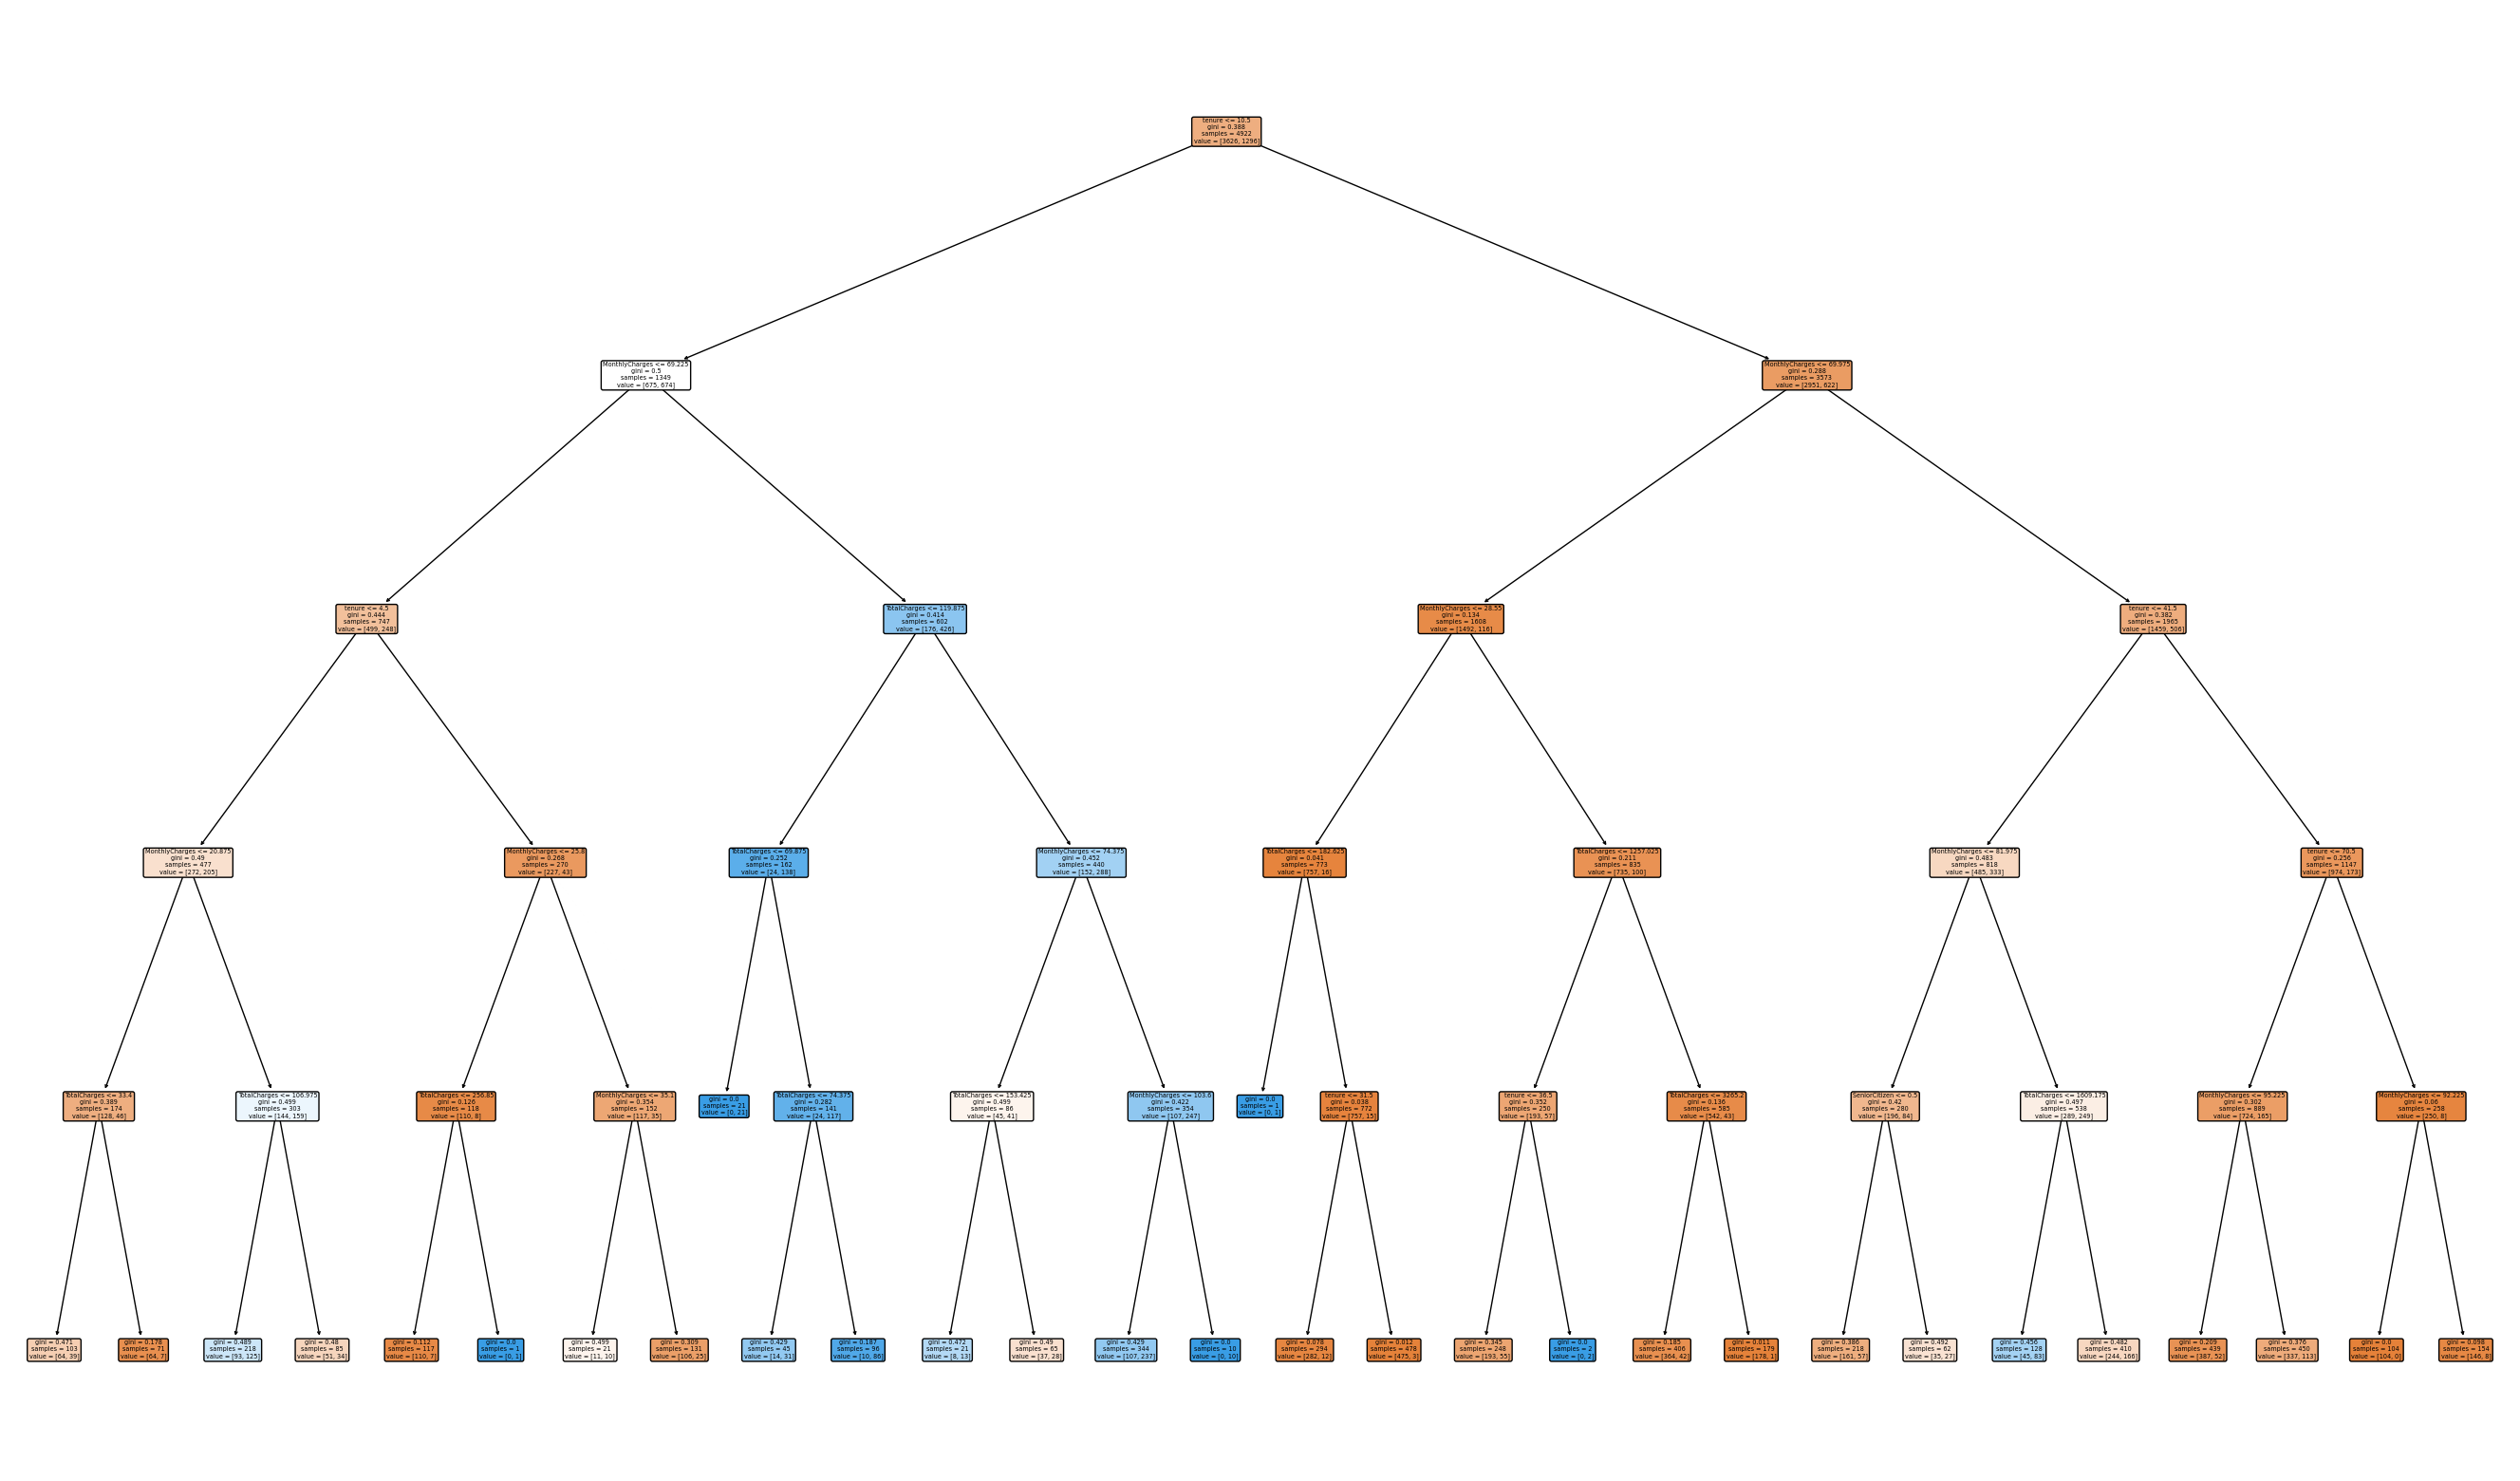

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=list(X.columns))
plt.show()

- 3. Create a function that takes a list of integers and trains and tests a Decision Tree Classifier using each integer as max_depth

In [40]:
def train_test_decision_tree(X_train, y_train, X_test, y_test, depths):
    print("Decision Tree Classifier Results:")
    print("===============================")
    for depth in depths:
        model = DecisionTreeClassifier(max_depth=depth)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        train_precision = precision_score(y_train, y_pred_train)
        test_precision = precision_score(y_test, y_pred_test)
        train_recall = recall_score(y_train, y_pred_train)
        test_recall = recall_score(y_test, y_pred_test)
        print(f"Max Depth: {depth}")
        print(f"  - Train Accuracy: {train_accuracy:.4f}")
        print(f"  - Test Accuracy: {test_accuracy:.4f}")
        print("---------------------------------")
        print(f"  - Train precision: {train_precision: .4f}")
        print(f"  - Test precision: {test_precision: .4f}")
        print("---------------------------------") 
        print(f"  - Train recall: {train_recall: .4f}")
        print(f"  - Test recall: {test_recall: .4f}")
        print("---------------------------------") 

In [45]:
depths = list(range(1, 21))
train_test_decision_tree(X_train, y_train, X_test, y_test, depths)

Decision Tree Classifier Results:
Max Depth: 1
  - Train Accuracy: 0.7367
  - Test Accuracy: 0.7284
---------------------------------
  - Train precision:  0.0000
  - Test precision:  0.0000
---------------------------------
  - Train recall:  0.0000
  - Test recall:  0.0000
---------------------------------
Max Depth: 2
  - Train Accuracy: 0.7875
  - Test Accuracy: 0.7692
---------------------------------
  - Train precision:  0.7076
  - Test precision:  0.6693
---------------------------------
  - Train recall:  0.3287
  - Test recall:  0.2967
---------------------------------
Max Depth: 3
  - Train Accuracy: 0.7875
  - Test Accuracy: 0.7692
---------------------------------
  - Train precision:  0.7076
  - Test precision:  0.6693
---------------------------------
  - Train recall:  0.3287
  - Test recall:  0.2967
---------------------------------
Max Depth: 4
  - Train Accuracy: 0.7915
  - Test Accuracy: 0.7692
---------------------------------
  - Train precision:  0.6646
  - Test 